In [4]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
X=[1,1,1,3,1,5,1,6,1,8,1,9,1,11,1,12]
x=np.asarray(X)
x=np.reshape(x,(8,2))
print(np.dot(x.T,x))
x_inv=np.linalg.inv(np.dot(x.T,x))
print('inv=)',x_inv)
x=x.reshape(8,2)
y=[0.5,10,8,5.4,14,15,17,20]
y=np.asarray(y)
y=y.reshape(8,1)
model=LinearRegression().fit(x,y)
print(model.score(x,y))
y_pred_train=model.predict(x)
print(((y_pred_train-y)**2).sum())
print('mean square error for train',8*mean_squared_error(y,y_pred_train))
print(model.coef_)
print('intercept is',model.intercept_)
print(np.mean([1,3,5,6,8,9,11,12]))
print(47.91/2)

[[  8  55]
 [ 55 481]]
inv=) [[ 0.58444714 -0.06682868]
 [-0.06682868  0.00972053]]
0.8365528370613915
47.91596597812879
mean square error for train 47.91596597812879
[[0.         1.54398542]]
intercept is [0.62260024]
6.875
23.955


In [38]:
a=1.03*10.14
print(a/.599)

17.436060100166948


In [22]:
X=[1,1,1,3,1,5,1,6,1,8,1,9,1,11,1,12]
x=np.asarray(X)
x=x.reshape(8,2)
y=[1.1,2.9,5,6.5,9,9.1,10.4,13.1]
y=np.asarray(y)
y=y.reshape(8,1)
model=LinearRegression().fit(x,y)
print(model.score(x,y))
y_pred_train=model.predict(x)
print('mean square error for train',mean_squared_error(y,y_pred_train))
print(model.coef_)
print('intercept is',model.intercept_)

0.9809233472012397
mean square error for train 0.2692162818955042
[[0.         1.03754557]]
intercept is [0.00437424]


In [46]:
a=np.asarray([1,3,5,6,8,9,11,12]).reshape(8,1)-np.mean([1,3,5,6,8,9,11,12])
b=np.linalg.norm(a,2)
(1.03*np.linalg.norm(a,2))/(.2692)**0.5

20.13513848986253

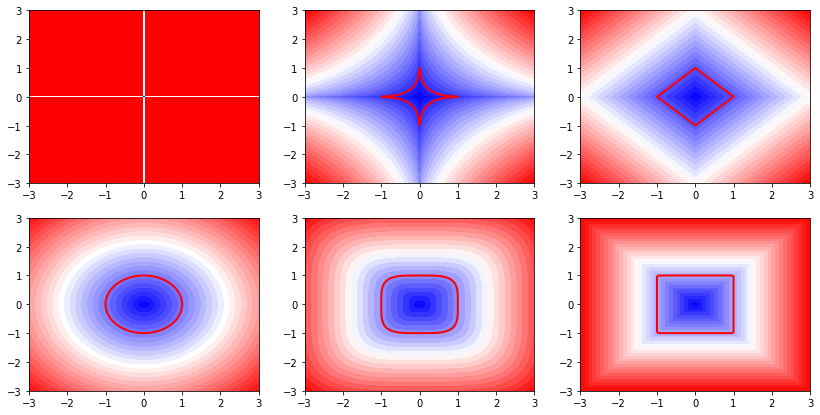

In [45]:
import matplotlib.pyplot as plt
import numpy as np

p_values = [0., 0.5, 1, 2, 4, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101), np.linspace(-3, 3, num=101))
fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                     nrows=2, figsize=(14, 7))
for p, ax in zip(p_values, axes.flat):
    if p == 0:
        zz = (xx != 0).astype(int) + (yy != 0).astype(int)
        ax.imshow(zz, cmap='bwr', extent=(xx.min(),xx.max(),yy.min(),yy.max()), aspect="auto")
    else:
        if np.isinf(p):
            zz = np.maximum(np.abs(xx),np.abs(yy))
        else:
            zz = ((np.abs((xx))**p) + (np.abs((yy))**p))**(1./p)
        ax.contourf(xx, yy, zz, 30, cmap='bwr')
        ax.contour(xx,yy,zz, [1], colors='red', linewidths = 2) 

plt.show()

In [61]:
import sys
import numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/housing.data' ,header=None, sep='\s+')
b=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
i=0
for a in b:
    data[a]=data[i]
    i+=1

for i in range(14):
    data.pop(i)
y=data.pop('MEDV')

In [62]:
data['ones']=pd.DataFrame(np.ones(506))

In [63]:
c=['ones','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
data=pd.DataFrame(data,columns=c)

In [64]:
import math
features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=data
X=np.asmatrix(X)
y=np.asarray(y).reshape(506,1)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-14)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((13,1))
for i in range(13):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
####first weakest feature
print('first weakest feature is',features[min_index])
X=pd.DataFrame(X,columns=c)
X.pop('AGE')
X



first weakest feature is AGE


,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,6.0622,3.0,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,5.5605,5.0,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15
8,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,6.0821,5.0,311.0,15.2,386.63,29.93
9,1.0,0.17004,12.5,7.87,0.0,0.524,6.004,6.5921,5.0,311.0,15.2,386.71,17.10


In [65]:
features=['CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-13)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((12,1))
for i in range(12):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('second weakest feature is',features[min_index])
features=['ones','CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('INDUS')
X


second weakest feature is INDUS


,ones,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,0.0,0.458,6.430,6.0622,3.0,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,0.0,0.524,6.012,5.5605,5.0,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15
8,1.0,0.21124,12.5,0.0,0.524,5.631,6.0821,5.0,311.0,15.2,386.63,29.93
9,1.0,0.17004,12.5,0.0,0.524,6.004,6.5921,5.0,311.0,15.2,386.71,17.10


In [308]:
features=list(X.columns)
features

['ones',
 'CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [66]:
features=['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-12)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((11,1))
for i in range(11):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('third weakest feature is',features[min_index])

third weakest feature is CHAS


In [67]:
features=['ones','CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('CHAS')
features=list(X.columns)
features

['ones',
 'CRIM',
 'ZN',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [68]:
features=['CRIM','ZN','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-11)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((10,1))
for i in range(10):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is ZN


In [69]:
features=['ones','CRIM','ZN','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('ZN')
features=list(X.columns)
features

['ones', 'CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [70]:
features=['CRIM','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-10)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((9,1))
for i in range(9):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is TAX


In [71]:
features=['ones','CRIM','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('TAX')
# features=list(X.columns)


0      296.0
1      242.0
2      242.0
3      222.0
4      222.0
5      222.0
6      311.0
7      311.0
8      311.0
9      311.0
10     311.0
11     311.0
12     311.0
13     307.0
14     307.0
15     307.0
16     307.0
17     307.0
18     307.0
19     307.0
20     307.0
21     307.0
22     307.0
23     307.0
24     307.0
25     307.0
26     307.0
27     307.0
28     307.0
29     307.0
       ...  
476    666.0
477    666.0
478    666.0
479    666.0
480    666.0
481    666.0
482    666.0
483    666.0
484    666.0
485    666.0
486    666.0
487    666.0
488    711.0
489    711.0
490    711.0
491    711.0
492    711.0
493    391.0
494    391.0
495    391.0
496    391.0
497    391.0
498    391.0
499    391.0
500    391.0
501    273.0
502    273.0
503    273.0
504    273.0
505    273.0
Name: TAX, Length: 506, dtype: float64

In [528]:
data

,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,1.0,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,1.0,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [72]:
features=['CRIM','NOX','RM','DIS','RAD','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-9)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((8,1))
for i in range(8):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is CRIM


In [73]:
features=['ones','CRIM','NOX','RM','DIS','RAD','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('CRIM')
features=list(X.columns)
features

['ones', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']

In [74]:
features=['NOX','RM','DIS','RAD','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-8)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((7,1))
for i in range(7):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is RAD


In [75]:
features=['ones','NOX','RM','DIS','RAD','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('RAD')
features=list(X.columns)
features

['ones', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [76]:
features=['NOX','RM','DIS','PTRATIO','B','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-7)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((6,1))
for i in range(6):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is B


In [77]:
features=['ones','NOX','RM','DIS','PTRATIO','B','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('B')
features=list(X.columns)
features

['ones', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']

In [78]:
features=['NOX','RM','DIS','PTRATIO','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-6)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((5,1))
for i in range(5):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is NOX


In [79]:
features=['ones','NOX','RM','DIS','PTRATIO','LSTAT']
X=pd.DataFrame(data[['ones','NOX','RM','DIS','PTRATIO','LSTAT']],columns=features)
X.pop('NOX')

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
5      0.458
6      0.524
7      0.524
8      0.524
9      0.524
10     0.524
11     0.524
12     0.524
13     0.538
14     0.538
15     0.538
16     0.538
17     0.538
18     0.538
19     0.538
20     0.538
21     0.538
22     0.538
23     0.538
24     0.538
25     0.538
26     0.538
27     0.538
28     0.538
29     0.538
       ...  
476    0.614
477    0.614
478    0.614
479    0.614
480    0.532
481    0.532
482    0.532
483    0.532
484    0.583
485    0.583
486    0.583
487    0.583
488    0.609
489    0.609
490    0.609
491    0.609
492    0.609
493    0.585
494    0.585
495    0.585
496    0.585
497    0.585
498    0.585
499    0.585
500    0.585
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

In [80]:
features=['RM','DIS','PTRATIO','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-5)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((4,1))
for i in range(4):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is DIS


In [81]:
features=['ones','RM','DIS','PTRATIO','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('DIS')
features=list(X.columns)
features

['ones', 'RM', 'PTRATIO', 'LSTAT']

In [82]:
features=['RM','PTRATIO','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-4)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((3,1))
for i in range(3):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is PTRATIO


In [83]:
features=['ones','RM','PTRATIO','LSTAT']
X=pd.DataFrame(X,columns=features)
X.pop('PTRATIO')
features=list(X.columns)
features

['ones', 'RM', 'LSTAT']

In [84]:
features=['RM','LSTAT']
X=np.asmatrix(X)
beta=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
y_hat=np.dot(X,beta)
y_hat=np.asarray(y_hat)
noise=(((y-y_hat)**2).sum())/(506-3)
V=np.linalg.inv(np.dot(X.T,X))
z_score=np.zeros((2,1))
for i in range(2):
    z_score[i] = beta[i+1] / (math.sqrt(noise * V[i+1,i+1]))
z_score= abs(z_score)
min_index = z_score.argmin()
print('fourth weakest feature is',features[min_index])

fourth weakest feature is RM


In [462]:
######backward selection sorting is bellow(from weakest to storngest(left to right))
a=['AGE','INDUS','CHAS','ZN','TAX','CRIM','RAD','B','NOX','DIS','PTRATIO','RM','LSTAT']

LETS DO SOME FORWARD SELECTION

In [85]:
data=pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/housing.data' ,header=None, sep='\s+')
b=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
i=0
for a in b:
    data[a]=data[i]
    i+=1

for i in range(14):
    data.pop(i)
y=data.pop('MEDV')
data['ones']=pd.DataFrame(np.ones(506))
c=['ones','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
data=pd.DataFrame(data,columns=c)

In [86]:
X=data
z_score = np.zeros((13,1))
feature=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
y=np.asarray(y).reshape(506,1)
X=np.asmatrix(X)
for i in range(1,13):
    X1 = np.c_[X[:, 0], X[:, i]]
    beta = np.linalg.inv(np.transpose(X1) * X1) * np.transpose(X1) * y
    y_hat = X1 * beta
    noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 2)
    V = np.linalg.inv(np.transpose(X1) * X1)
    z_score[i-1] = beta[1] / (math.sqrt(noise_var * V[1,1]))
z_score = abs(z_score)
max_index1 = np.argmax(z_score)
print(feature[max_index1])

RM


In [87]:
X1 = np.c_[X[:, 0], X[:, max_index1+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if(i != (max_index1+1)):
        X2 = np.c_[X1, X[:, i]]
        beta = np.linalg.inv(np.transpose(X2) * X2) * np.transpose(X2) * y
        y_hat = X2 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 3)
        V = np.linalg.inv(np.transpose(X2) * X2)
        z_score[i-1] = beta[2] / (math.sqrt(noise_var * V[2,2]))
z_score = abs(z_score)
max_index2 = np.argmax(z_score)
print(feature[max_index2])

PTRATIO


In [466]:
X2 = np.c_[X1, X[:, max_index2+1]]
X2

matrix([[ 1.   ,  6.575, 15.3  ],
        [ 1.   ,  6.421, 17.8  ],
        [ 1.   ,  7.185, 17.8  ],
        ...,
        [ 1.   ,  6.976, 21.   ],
        [ 1.   ,  6.794, 21.   ],
        [ 1.   ,  6.03 , 21.   ]])

In [88]:
X2 = np.c_[X1, X[:, max_index2+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1)):
        X3 = np.c_[X2, X[:, i]]
        beta = np.linalg.inv(np.transpose(X3) * X3) * np.transpose(X3) * y
        y_hat = X3 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 4)
        V = np.linalg.inv(np.transpose(X3) * X3)
        z_score[i-1] = beta[3] / (math.sqrt(noise_var * V[3,3]))
z_score = abs(z_score)
max_index3 = np.argmax(z_score)
print(feature[max_index3])

B


In [468]:
X3 = np.c_[X2, X[:, max_index3+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)):
        X4 = np.c_[X3, X[:, i]]
        beta = np.linalg.inv(np.transpose(X4) * X4) * np.transpose(X4) * y
        y_hat = X4 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 5)
        V = np.linalg.inv(np.transpose(X4) * X4)
        z_score[i-1] = beta[4] / (math.sqrt(noise_var * V[4,4]))
z_score = abs(z_score)
max_index4 = np.argmax(z_score)
print(feature[max_index4])

NOX


In [469]:
X4 = np.c_[X3, X[:, max_index4+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))):
        X5 = np.c_[X4, X[:, i]]
        beta = np.linalg.inv(np.transpose(X5) * X5) * np.transpose(X5) * y
        y_hat = X5 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 6)
        V = np.linalg.inv(np.transpose(X5) * X5)
        z_score[i-1] = beta[5] / (math.sqrt(noise_var * V[5,5]))
z_score = abs(z_score)
max_index5 = np.argmax(z_score)
print(feature[max_index5])

DIS


In [470]:
X5 = np.c_[X4, X[:, max_index5+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))):
        X6 = np.c_[X5, X[:, i]]
        beta = np.linalg.inv(np.transpose(X6) * X6) * np.transpose(X6) * y
        y_hat = X6 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 7)
        V = np.linalg.inv(np.transpose(X6) * X6)
        z_score[i-1] = beta[6] / (math.sqrt(noise_var * V[6,6]))
z_score = abs(z_score)
max_index6 = np.argmax(z_score)
print(feature[max_index6])

AGE


In [471]:
X6 = np.c_[X5, X[:, max_index6+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))):
        X7 = np.c_[X6, X[:, i]]
        beta = np.linalg.inv(np.transpose(X7) * X7) * np.transpose(X7) * y
        y_hat = X7 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 8)
        V = np.linalg.inv(np.transpose(X7) * X7)
        z_score[i-1] = beta[7] / (math.sqrt(noise_var * V[7,7]))
z_score = abs(z_score)
max_index7 = np.argmax(z_score)
print(feature[max_index7])

CHAS


In [472]:
X7 = np.c_[X6, X[:, max_index7+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))and(i != (max_index7 + 1))):
        X8 = np.c_[X7, X[:, i]]
        beta = np.linalg.inv(np.transpose(X8) * X8) * np.transpose(X8) * y
        y_hat = X8 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 9)
        V = np.linalg.inv(np.transpose(X8) * X8)
        z_score[i-1] = beta[8] / (math.sqrt(noise_var * V[8,8]))
z_score = abs(z_score)
max_index8 = np.argmax(z_score)
print(feature[max_index8])

CRIM


In [451]:
X8 = np.c_[X7, X[:, max_index8+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))and(i != (max_index7 + 1))and(i != (max_index8 + 1))):
        X9 = np.c_[X8, X[:, i]]
        beta = np.linalg.inv(np.transpose(X9) * X9) * np.transpose(X9) * y
        y_hat = X9 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 10)
        V = np.linalg.inv(np.transpose(X9) * X9)
        z_score[i-1] = beta[9] / (math.sqrt(noise_var * V[9,9]))
z_score = abs(z_score)
max_index9 = np.argmax(z_score)
print(feature[max_index9])

RAD


In [452]:
X9 = np.c_[X8, X[:, max_index9+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))and(i != (max_index7 + 1))and(i != (max_index8 + 1))and(i != (max_index9 + 1))):
        X10 = np.c_[X9, X[:, i]]
        beta = np.linalg.inv(np.transpose(X10) * X10) * np.transpose(X10) * y
        y_hat = X10 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 11)
        V = np.linalg.inv(np.transpose(X10) * X10)
        z_score[i-1] = beta[10] / (math.sqrt(noise_var * V[10,10]))
z_score = abs(z_score)
max_index10 = np.argmax(z_score)
print(feature[max_index10])

TAX


In [453]:
X10 = np.c_[X9, X[:, max_index10+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))and(i != (max_index7 + 1))and(i != (max_index8 + 1))and(i != (max_index9 + 1))and(i != (max_index10 + 1))):
        X11 = np.c_[X10, X[:, i]]
        beta = np.linalg.inv(np.transpose(X11) * X11) * np.transpose(X11) * y
        y_hat = X11 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 12)
        V = np.linalg.inv(np.transpose(X11) * X11)
        z_score[i-1] = beta[11] / (math.sqrt(noise_var * V[11,11]))
z_score = abs(z_score)
max_index11 = np.argmax(z_score)
print(feature[max_index11])

ZN


In [454]:
X11 = np.c_[X10, X[:, max_index11+1]]
#find 2nd strong feature
z_score = np.zeros((13, 1))
for i in range(1,13):
    if (i != (max_index1 + 1)) and (i != (max_index2 + 1))and(i != (max_index3 + 1)and(i != (max_index4 + 1))and(i != (max_index5 + 1))
    and(i != (max_index6 + 1))and(i != (max_index7 + 1))and(i != (max_index8 + 1))and(i != (max_index9 + 1))and(i != (max_index10 + 1))
    and(i != (max_index11 + 1))):
        X12 = np.c_[X11, X[:, i]]
        beta = np.linalg.inv(np.transpose(X12) * X12) * np.transpose(X12) * y
        y_hat = X12 * beta
        noise_var = (np.transpose(y - y_hat) * (y - y_hat)) / (330 - 13)
        V = np.linalg.inv(np.transpose(X12) * X12)
        z_score[i-1] = beta[12] / (math.sqrt(noise_var * V[12,12]))
z_score = abs(z_score)
max_index12 = np.argmax(z_score)
print(feature[max_index12])

INDUS


In [474]:
X12 = np.c_[X11, X[:, max_index12+1]]
X12

matrix([[  1.   ,   6.575,  15.3  , ..., 296.   ,  18.   ,   2.31 ],
        [  1.   ,   6.421,  17.8  , ..., 242.   ,   0.   ,   7.07 ],
        [  1.   ,   7.185,  17.8  , ..., 242.   ,   0.   ,   7.07 ],
        ...,
        [  1.   ,   6.976,  21.   , ..., 273.   ,   0.   ,  11.93 ],
        [  1.   ,   6.794,  21.   , ..., 273.   ,   0.   ,  11.93 ],
        [  1.   ,   6.03 ,  21.   , ..., 273.   ,   0.   ,  11.93 ]])

matrix([[1.0000e+00, 6.5750e+00, 1.5300e+01, ..., 1.8000e+01, 2.3100e+00,
         6.3200e-03],
        [1.0000e+00, 6.4210e+00, 1.7800e+01, ..., 0.0000e+00, 7.0700e+00,
         2.7310e-02],
        [1.0000e+00, 7.1850e+00, 1.7800e+01, ..., 0.0000e+00, 7.0700e+00,
         2.7290e-02],
        ...,
        [1.0000e+00, 6.9760e+00, 2.1000e+01, ..., 0.0000e+00, 1.1930e+01,
         6.0760e-02],
        [1.0000e+00, 6.7940e+00, 2.1000e+01, ..., 0.0000e+00, 1.1930e+01,
         1.0959e-01],
        [1.0000e+00, 6.0300e+00, 2.1000e+01, ..., 0.0000e+00, 1.1930e+01,
         4.7410e-02]])

In [460]:
########forward selection :features from weakest to strongest(left to right)
b=['LSTAT','INDUS','ZN','TAX','RAD','CRIM','CHAS','AGE','DIS','NOX','B','PTRATIO','RM']

,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,1.0,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,1.0,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


####Regression by regularization term####

In [40]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size=.95,random_state=1)
clf = Ridge()
coefs = []
error_train = []
error_test = []

alphas = np.logspace(-3,2, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x_train, y_train)
    coefs.append(clf.coef_)
    error_train.append(mean_squared_error(y_train,clf.predict(x_train)))
    error_test.append(mean_squared_error(y_test,clf.predict(x_test)))


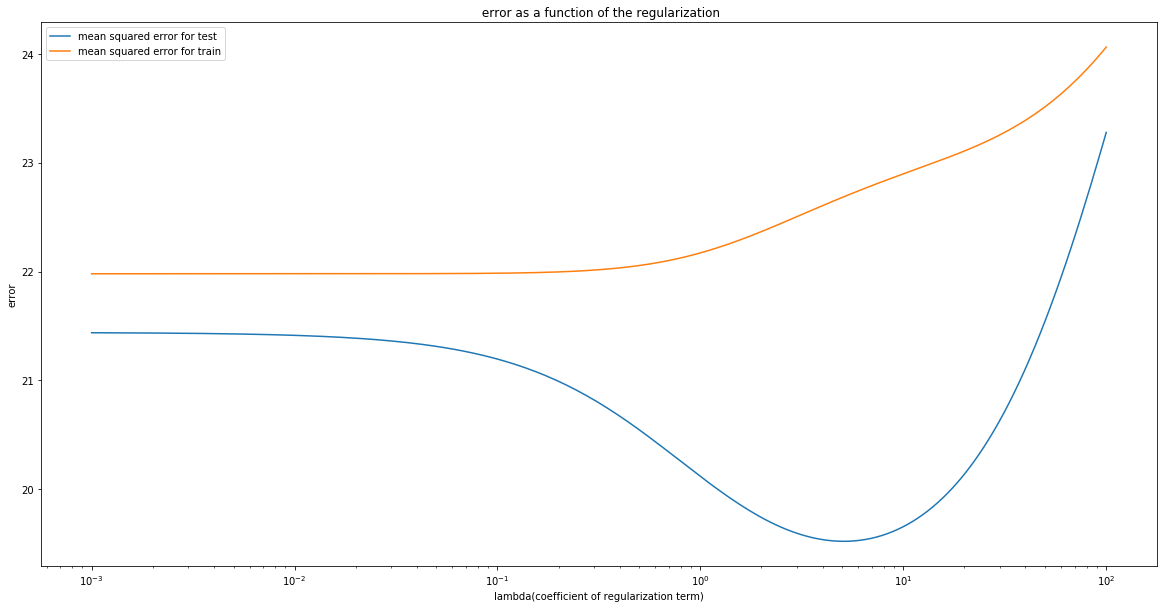

In [49]:
plt.figure(figsize=[20,10])
ax = plt.gca()
ax.plot(alphas, error_test,label='mean squared error for test')
ax.plot(alphas, error_train,label='mean squared error for train')
ax.set_xscale('log')
plt.xlabel('lambda(coefficient of regularization term)')
plt.ylabel('error')
plt.title(' error as a function of the regularization')
plt.axis('tight')
plt.legend()

In [94]:
#####regression for forward selection for three most important features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
data=pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/housing.data' ,header=None, sep='\s+')
b=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
i=0
for a in b:
    data[a]=data[i]
    i+=1
for i in range(14):
    data.pop(i)
y=data.pop('MEDV')
y=(np.asarray(y)).reshape(-1,1)
x=data[['RM','PTRATIO','B']]
# # des=data.describe().T
# # data_norme3=(data-des['mean'])/des['std']
# # y=data_norme3.pop('MEDV')
# c=np.linspace(.1,.99,50)
x_train, x_test, y_train, y_test = train_test_split(
x,
y,
train_size=.7,random_state=1)
reg = LinearRegression().fit(x_train, y_train)
print('score is ',reg.score(x_test,y_test))
print(' mean square train error ',mean_squared_error(reg.predict(x_train),y_train))
print(' mean square test error ',mean_squared_error(reg.predict(x_test),y_test))


score is  0.7111927174772167
 mean square train error  36.69465011769556
 mean square test error  26.470483350890515


In [96]:
#####regression for backward selection for three most important features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
data=pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/housing.data' ,header=None, sep='\s+')
b=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
i=0
for a in b:
    data[a]=data[i]
    i+=1
for i in range(14):
    data.pop(i)
y=data.pop('MEDV')
y=(np.asarray(y)).reshape(-1,1)
x=data[['RM','PTRATIO','LSTAT']]
# # des=data.describe().T
# # data_norme3=(data-des['mean'])/des['std']
# # y=data_norme3.pop('MEDV')
# c=np.linspace(.1,.99,50)
x_train, x_test, y_train, y_test = train_test_split(
x,
y,
train_size=.7,random_state=1)
reg = LinearRegression().fit(x_train, y_train)
print('score is ',reg.score(x_test,y_test))
print(' mean square train error ',mean_squared_error(reg.predict(x_train),y_train))
print(' mean square test error ',mean_squared_error(reg.predict(x_test),y_test))





score is  0.7228623473287098
 mean square train error  28.35603780904954
 mean square test error  25.40090941218404


In [97]:
######regression with all variable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
data=pd.read_csv('/Users/amirhossein/Desktop/sharif/third semester/statistical learning/HW1 3/housing.data' ,header=None, sep='\s+')
b=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
i=0
for a in b:
    data[a]=data[i]
    i+=1
for i in range(14):
    data.pop(i)
y=data.pop('MEDV')
y=(np.asarray(y)).reshape(-1,1)
x=data
# # des=data.describe().T
# # data_norme3=(data-des['mean'])/des['std']
# # y=data_norme3.pop('MEDV')
# c=np.linspace(.1,.99,50)
x_train, x_test, y_train, y_test = train_test_split(
x,
y,
train_size=.7,random_state=1)
reg = LinearRegression().fit(x_train, y_train)
print('score is ',reg.score(x_test,y_test))
print(' mean square train error ',mean_squared_error(reg.predict(x_train),y_train))
print(' mean square test error ',mean_squared_error(reg.predict(x_test),y_test))


score is  0.7836295385076265
 mean square train error  23.51333444932702
 mean square test error  19.831323672063387
